In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


> 

In [59]:
train_csv=pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test_csv=pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [2]:
data=pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


**Trying to solve problem without reference.**
* Data visulization 
* Feature Engineering
* Feature Selection
* Train Model
* Improve Accuracy with hyperparameter tuning


Insight of Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Data.info() gives the information regarding data set. By looking that we could say that there are 81 columns in which 3 different datatypes namely float64(3), int64(35), object(43). 

Machine Learning model is calculation of Mathematics so we could not give object type to the model. Therefore, we have to convert them in float or int.

we could remove it by feature engineering before that we will try to find null value that could be problematic for feature engineering.

In [4]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

there are many coulmns which contains null values. we have to handle them by filling notnull values.

Imputation of categorical column null values:

* Frequent category Imputation
* Adding new variable for Multiple categories
* Apply classifier algorithm
* Adding new column and Impute categories
* Apply Unsupervised algorithm
* Many More


Imputation of Numerical column null values.
* Mean/Median/Mode Imputation (MCAR)
* Random Sample IMputation
* Create a new column and Impute values
* Generate Model(regression) for Imputation
* End of Distribution Imputation
* Many More.... 

Let's Implement some of them.

In [5]:
null_columns=data.columns[data.isnull().any()]
print(null_columns)
data[null_columns].isnull().sum()

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
data[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In our data we have total 1460 rows in which Alley, PoolQC, Fence and Miscfeature have most of null values. Therefore, we will drop that columns as imputation is not wiser options for us. 

In [7]:
data_copy=data

In [8]:
null_columns_for_drop=['Alley','PoolQC','Fence','MiscFeature']
data_copy=data_copy.drop(columns=null_columns_for_drop)

Handling NUmerical variable :
* LotFrontage
* MasVnrArea
* GarageYrBlt


In [9]:
data_copy['MasVnrArea'].mean()
data_copy['GarageYrBlt'].mean()

1978.5061638868744

In [10]:
data_copy['MasVnrArea'].fillna(data_copy['MasVnrArea'].mean(),inplace=True)

In [11]:
data_copy['GarageYrBlt'].fillna(data_copy['GarageYrBlt'].mean(),inplace=True)

In [12]:
data_copy['LotFrontage'].fillna(data_copy['LotFrontage'].mean(),inplace=True)

In [13]:
data_copy['MasVnrType'].fillna(value='None',inplace=True)
data_copy['BsmtCond'].fillna(value='TA',inplace=True)
data_copy['BsmtExposure'].fillna(value='No',inplace=True)
data_copy['BsmtFinType2'].fillna(value='Unf',inplace=True)
data_copy['Electrical'].fillna(value='SBrkr',inplace=True)
data_copy['GarageType'].fillna(value='Attchd',inplace=True)
data_copy['GarageQual'].fillna(value='TA',inplace=True)
data_copy['GarageCond'].fillna(value='TA',inplace=True)

In [14]:
data_copy['BsmtQual_map']=data_copy.BsmtQual.map({'TA':1,'Gd':2,'Ex':3,'Fa':4})

In [15]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=4)
data_copy['BsmtQual_map']=imputer.fit_transform(data_copy[['BsmtQual_map']])

In [16]:
data_copy.drop(columns='BsmtQual',inplace=True)

In [17]:
data_copy['FireplaceQu']=data_copy['FireplaceQu'].map({'Gd':1,'TA':2,'Fa':3,'Ex':4,'Po':5})
#data_copy['FireplaceQu']

In [18]:
impute=KNNImputer(n_neighbors=5)
data_copy['FireplaceQu']=impute.fit_transform(data_copy[['FireplaceQu']])

In [19]:
# Unf    430
# GLQ    418
# ALQ    220
# BLQ    148
# Rec    133
# LwQ     74
# Name: BsmtFinType1, dtype: int64
data_copy['BsmtFinType1']=data_copy['BsmtFinType1'].map({'Unf':1,'GLQ':2,'ALQ':3,'BLQ':4,'Rec':5,'LwQ':6})

In [20]:
imputer=KNNImputer(n_neighbors=5)
data_copy['BsmtFinType1']=imputer.fit_transform(data_copy[['BsmtFinType1']])

In [21]:
# Unf    605
# RFn    422
# Fin    352
# Name: GarageFinish, dtype: int64
data_copy['GarageFinish']=data_copy['GarageFinish'].map({'Unf':1,'RFn':2,'Fin':3})

In [22]:
imputer=KNNImputer(n_neighbors=5)
data_copy['GarageFinish']=imputer.fit_transform(data_copy[['GarageFinish']])

# Encoding of data 
 Convert objet type into numeric Type
 Nominal Features :
*  one hot encoding
*  One hot encoding for multiple categories
*  mean encoding
*  ....
 
 Ordinal Features:
 Example:- Graduation:1 Post_Graduation:2 Phd:3
*  LabelEncoding
*  TargetGuidedEncoding
*  .....

In [23]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
data_copy['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [25]:
data_copy_encoding=data_copy.copy()
data_copy_encoding=pd.get_dummies(data_copy_encoding,columns=['MSZoning'],drop_first=True)

In [26]:
import numpy as np
data_copy_encoding['Street_Pave']=np.where(data_copy_encoding['Street'].str.contains('Pave'),1,0)


In [27]:
data_copy_encoding.drop(columns=['Street'],inplace=True)

In [28]:
data_copy_encoding['Utilities']=np.where(data_copy_encoding['Utilities'].str.contains('AllPub'),1,0)

In [29]:
data_copy_encoding['CentralAir']=np.where(data_copy_encoding['CentralAir'].str.contains('Y'),1,0)

In [30]:
# Lvl    1311
# Bnk      63
# HLS      50
# Low      36
# Name: LandContour, dtype: int64
data_copy_encoding['LandContour']=np.where(data_copy_encoding['LandContour'].str.contains('Lvl'),1,0)

In [31]:
# Norm      1445
# Feedr        6
# PosN         2
# RRNn         2
# Artery       2
# PosA         1
# RRAn         1
# RRAe         1
# Name: Condition2, dtype: int64
data_copy_encoding['Condition2']=np.where(data_copy_encoding['Condition2'].str.contains('Norm'),1,0)

In [32]:
# CompShg    1434
# Tar&Grv      11
# WdShngl       6
# WdShake       5
# ClyTile       1
# Metal         1
# Membran       1
# Roll          1
# Name: RoofMatl, dtype: int64
data_copy_encoding['RoofMatl']=np.where(data_copy_encoding['RoofMatl'].str.contains('CompShg'),1,0)

In [33]:
# GasA     1428
# GasW       18
# Grav        7
# Wall        4
# OthW        2
# Floor       1
# Name: Heating, dtype: int64
data_copy_encoding['Heating']=np.where(data_copy_encoding['Heating'].str.contains('GasA'),1,0)

In [34]:
# TA    1407
# Fa      35
# Gd       9
# Po       7
# Ex       2
# Name: GarageCond, dtype: int64
data_copy_encoding['GarageCond']=np.where(data_copy_encoding['GarageCond'].str.contains('TA'),1,0)

In [35]:
# TA    1392
# Fa      48
# Gd      14
# Po       3
# Ex       3
# Name: GarageQual, dtype: int64
data_copy_encoding['GarageQual']=np.where(data_copy_encoding['GarageQual'].str.contains('TA'),1,0)

In [36]:
# TA    1348
# Gd      65
# Fa      45
# Po       2
# Name: BsmtCond, dtype: int64
data_copy_encoding['BsmtCond']=np.where(data_copy_encoding['BsmtCond'].str.contains('TA'),1,0)

In [37]:
data_copy_encoding['PavedDrive']=data_copy_encoding['PavedDrive'].map({'Y':1,'N':2,'P':3})

In [38]:
data_copy_encoding['LotShape']=data_copy_encoding['LotShape'].map({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

In [39]:
data_copy_encoding['LandSlope']=data_copy_encoding['LandSlope'].map({'Gtl':1,'Mod':2,'Sev':3})

In [40]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
data_copy_encoding['LotConfig']=ord_enc.fit_transform(data_copy_encoding[['LotConfig']])

In [41]:
data_copy_encoding['Neighborhood']=ord_enc.fit_transform(data_copy_encoding[['Neighborhood']])

In [42]:
data_copy_encoding['Condition1']=ord_enc.fit_transform(data_copy_encoding[['Condition1']])

In [43]:
data_copy_encoding['BldgType']=ord_enc.fit_transform(data_copy_encoding[['BldgType']])

In [44]:
data_copy_encoding['HouseStyle']=ord_enc.fit_transform(data_copy_encoding[['HouseStyle']])

In [45]:
for col in (data_copy_encoding.select_dtypes(include=['object'])).columns:
    print(col)
    data_copy_encoding[col]=ord_enc.fit_transform(data_copy_encoding[[col]])


RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtExposure
BsmtFinType2
HeatingQC
Electrical
KitchenQual
Functional
GarageType
SaleType
SaleCondition


Feature engineering - Transformation and Normlization


# Feature Selection 


There are many techniques are available for feature selection based on problem statement types (Supervised or Unsupervised). 

Mainly unsupervised has three types of it called Fileter, Wrapper and Iristinic and Embeded.

* Chi2
* Mutual_info_regressor
* Mutual_info_classifier
* correlation 
* ...


In [46]:
x=data_copy_encoding.loc[:,data_copy_encoding.columns!='SalePrice']
y=data_copy_encoding['SalePrice']

In [47]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
fs=SelectKBest(chi2,k=30)
fs.fit(x,y)
x_fs=fs.transform(x)

In [48]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=10)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 1.24


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
x_fs.shape

(1460, 30)

In [51]:
ser=pd.Series(fs.scores_,index=x.columns)
ser.nlargest(n=20)

LotArea          1.011497e+07
MiscVal          6.253332e+06
2ndFlrSF         4.648841e+05
BsmtFinSF1       3.999851e+05
PoolArea         3.835642e+05
BsmtFinSF2       3.688827e+05
MasVnrArea       2.857403e+05
BsmtUnfSF        2.747512e+05
LowQualFinSF     2.448810e+05
GrLivArea        1.968501e+05
TotalBsmtSF      1.747065e+05
3SsnPorch        1.549360e+05
Id               1.548417e+05
ScreenPorch      1.366295e+05
WoodDeckSF       1.298338e+05
1stFlrSF         1.238098e+05
EnclosedPorch    9.888657e+04
GarageArea       9.618405e+04
OpenPorchSF      7.436257e+04
MSSubClass       1.928123e+04
dtype: float64

In [52]:
pd.Series(fs.scores_,index=x.columns)

Id               1.548417e+05
MSSubClass       1.928123e+04
LotFrontage      5.066301e+03
LotArea          1.011497e+07
LotShape         1.981534e+02
LandContour      7.008853e+01
Utilities        1.660955e-01
LotConfig        5.646336e+02
LandSlope        5.220582e+01
Neighborhood     2.194267e+03
Condition1       2.126163e+02
Condition2       6.392458e+00
BldgType         1.951478e+03
HouseStyle       8.128877e+02
OverallQual      3.780776e+02
OverallCond      1.549787e+02
YearBuilt        4.438528e+02
YearRemodAdd     1.888822e+02
RoofStyle        3.560536e+02
RoofMatl         1.063666e+01
Exterior1st      6.960259e+02
Exterior2nd      8.086199e+02
MasVnrType       1.612400e+02
MasVnrArea       2.857403e+05
ExterQual        2.097772e+02
ExterCond        8.776960e+01
Foundation       3.023334e+02
BsmtCond         5.237761e+01
BsmtExposure     4.421757e+02
BsmtFinType1     5.655145e+02
BsmtFinSF1       3.999851e+05
BsmtFinType2     1.100945e+02
BsmtFinSF2       3.688827e+05
BsmtUnfSF 

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)


ExtraTreesRegressor()

In [54]:
pd.Series(model.feature_importances_,index=x.columns)

Id               0.003375
MSSubClass       0.002457
LotFrontage      0.003876
LotArea          0.006622
LotShape         0.002884
LandContour      0.002716
Utilities        0.000007
LotConfig        0.002221
LandSlope        0.002984
Neighborhood     0.005899
Condition1       0.001309
Condition2       0.000587
BldgType         0.002112
HouseStyle       0.001903
OverallQual      0.225367
OverallCond      0.004645
YearBuilt        0.023736
YearRemodAdd     0.008141
RoofStyle        0.002545
RoofMatl         0.000896
Exterior1st      0.002269
Exterior2nd      0.001813
MasVnrType       0.002249
MasVnrArea       0.006870
ExterQual        0.111179
ExterCond        0.001360
Foundation       0.001451
BsmtCond         0.000809
BsmtExposure     0.003821
BsmtFinType1     0.002059
BsmtFinSF1       0.017172
BsmtFinType2     0.000648
BsmtFinSF2       0.000858
BsmtUnfSF        0.003140
TotalBsmtSF      0.024981
Heating          0.000423
HeatingQC        0.001700
CentralAir       0.006692
Electrical  

<AxesSubplot:>

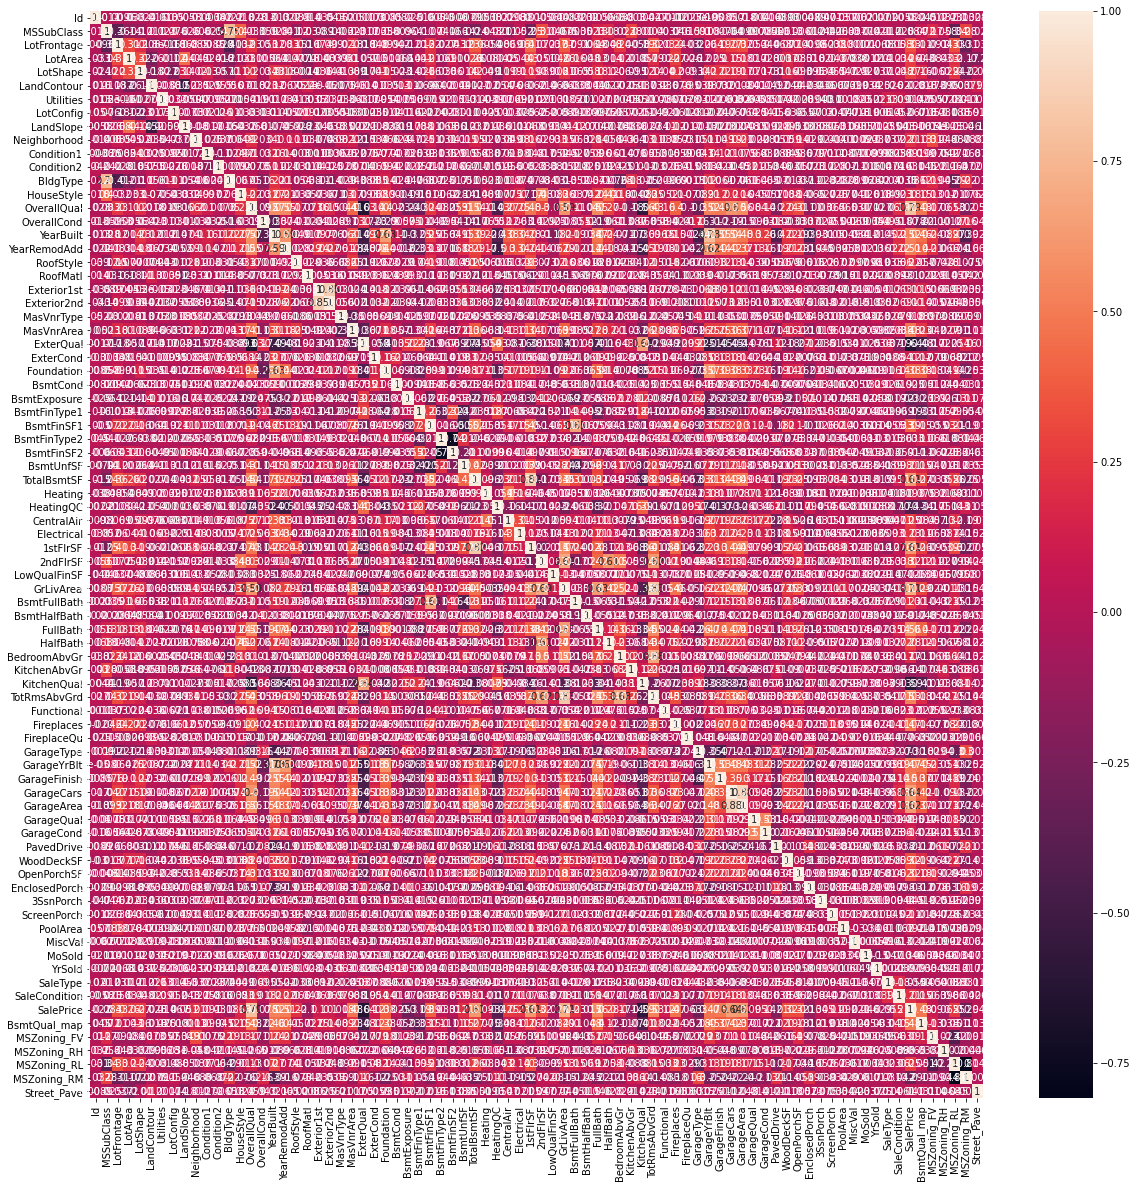

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data_copy_encoding.corr(),annot=True)

In [56]:
data_copy_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   Utilities      1460 non-null   int64  
 7   LotConfig      1460 non-null   float64
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   float64
 10  Condition1     1460 non-null   float64
 11  Condition2     1460 non-null   int64  
 12  BldgType       1460 non-null   float64
 13  HouseStyle     1460 non-null   float64
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [57]:
for col in (data_copy_encoding.select_dtypes(include=['object'])).columns:
    print(data_copy_encoding[col].value_counts())

In [58]:
data_copy_encoding.head(20)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,BsmtQual_map,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,1,60,65.000000,8450,1,1,1,4.0,1,5.0,...,2008,8.0,4.0,208500,2.000000,0,0,1,0,1
1,2,20,80.000000,9600,1,1,1,2.0,1,24.0,...,2007,8.0,4.0,181500,2.000000,0,0,1,0,1
2,3,60,68.000000,11250,2,1,1,4.0,1,5.0,...,2008,8.0,4.0,223500,2.000000,0,0,1,0,1
3,4,70,60.000000,9550,2,1,1,0.0,1,6.0,...,2006,8.0,0.0,140000,1.000000,0,0,1,0,1
4,5,60,84.000000,14260,2,1,1,2.0,1,15.0,...,2008,8.0,4.0,250000,2.000000,0,0,1,0,1
5,6,50,85.000000,14115,2,1,1,4.0,1,11.0,...,2009,8.0,4.0,143000,2.000000,0,0,1,0,1
6,7,20,75.000000,10084,1,1,1,4.0,1,21.0,...,2007,8.0,4.0,307000,3.000000,0,0,1,0,1
7,8,60,70.049958,10382,2,1,1,0.0,1,14.0,...,2009,8.0,4.0,200000,2.000000,0,0,1,0,1
8,9,50,51.000000,6120,1,1,1,4.0,1,17.0,...,2008,8.0,0.0,129900,1.000000,0,0,0,1,1
9,10,190,50.000000,7420,1,1,1,0.0,1,3.0,...,2008,8.0,4.0,118000,1.000000,0,0,1,0,1
